In [9]:
import sys
sys.path.append("..")
import torch
import random
import d2l.torch as d2l

features: tensor([ 1.6935, -0.5940]) 
label: tensor([9.6095])


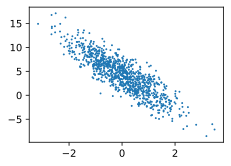

In [10]:
'''
1.生成数据集
数据集特性：
(1).2个特征,1000个样本 (每个样本包含从标准正态分布中采样的2个特征)
(2).y=Xw+b+ϵ w=[2,−3.4]⊤ , b=4.2 ϵ是捕获样本和标签时产生的误差,假设误差符合正态分布,均值为0,标准差为0.01
'''


def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, torch.reshape(y, (-1, 1))


true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

print('features:', features[0], '\nlabel:', labels[0])

d2l.set_figsize()

d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels),1);  #plt.scatter(x, y, s, c ,marker, alpha) x,y: x轴与y轴的数据 s: 点的面积


In [11]:
'''
2.读取数据集
'''

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
    yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2220, -1.3442],
        [-1.8654,  0.6550],
        [-0.0143,  1.4414],
        [ 0.7963, -1.1105],
        [ 0.9246, -0.9221],
        [-0.0263, -0.9516],
        [ 0.4636,  1.8499],
        [-0.4258,  2.7968],
        [ 1.4266,  1.6104],
        [ 0.0228,  0.1042]]) 
 tensor([[ 8.3153],
        [-1.7637],
        [-0.7410],
        [ 9.5650],
        [ 9.1796],
        [ 7.3811],
        [-1.1499],
        [-6.1527],
        [ 1.5894],
        [ 3.8993]])


In [12]:
'''初始化模型参数'''
w = torch.normal(0,0.01,(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
print(w)
print(b)

tensor([[-0.0082],
        [ 0.0082]], requires_grad=True)
tensor([0.], requires_grad=True)


In [13]:
'''定义模型'''

'线性回归模型'
def linreg(X, w, b):

    return torch.matmul(X, w) + b

In [14]:
'''定义损失函数'''

'均方损失'
def squared_loss(y_hat, y):

    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [15]:
'''定义优化算法'''

'小批量随机梯度下降'
def sgd(params, lr, batch_size):

    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()


In [16]:
'''训练'''
lr = 0.03
num_epochs = 30
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b],lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

epoch 1, loss 15.465741
epoch 2, loss 14.246591
epoch 3, loss 13.830987
epoch 4, loss 13.583997
epoch 5, loss 12.990492
epoch 6, loss 12.186084
epoch 7, loss 11.554273
epoch 8, loss 10.639760
epoch 9, loss 10.050757
epoch 10, loss 9.407732
epoch 11, loss 8.563720
epoch 12, loss 8.280755
epoch 13, loss 7.786283
epoch 14, loss 7.351724
epoch 15, loss 6.972219
epoch 16, loss 6.652879
epoch 17, loss 6.126976
epoch 18, loss 5.957460
epoch 19, loss 5.466598
epoch 20, loss 5.226026
epoch 21, loss 4.696168
epoch 22, loss 4.464446
epoch 23, loss 4.149309
epoch 24, loss 3.872642
epoch 25, loss 3.643965
epoch 26, loss 3.490862
epoch 27, loss 3.299328
epoch 28, loss 2.966595
epoch 29, loss 2.872622
epoch 30, loss 2.751049
w的估计误差: tensor([ 0.9071, -1.4535], grad_fn=<SubBackward0>)
b的估计误差: tensor([1.6207], grad_fn=<RsubBackward1>)
